# Telco Customer Churn Analysis
## Data Visualization

This data set is from Kaggle
https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#!pip install import-ipynb

uncomment this if you do not have import-ipynb, it's for importing Jupyter Notebooks (ipynb) to another Notebooks

Dataset Shape: (7043, 21)
Basic Statistics for Numerical Columns:
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


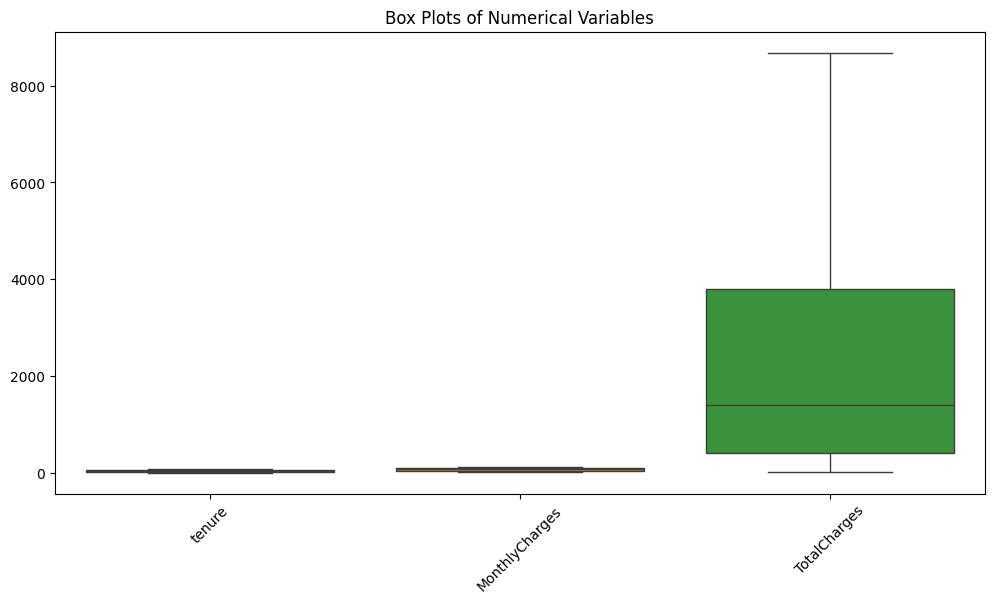

tenure:
Number of outliers: 0
Lower bound: -60.00
Upper bound: 124.00
Min value: 0.00
Max value: 72.00
MonthlyCharges:
Number of outliers: 0
Lower bound: -46.02
Upper bound: 171.38
Min value: 18.25
Max value: 118.75
TotalCharges:
Number of outliers: 0
Lower bound: -4688.48
Upper bound: 8884.67
Min value: 18.80
Max value: 8684.80
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
Churn Bool            int64
dtype: object


In [3]:
import import_ipynb
import data_cleaning

In [4]:
df = data_cleaning.df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Bool
0,7590-VHVEG,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,month-to-month,yes,electronic check,29.85,29.85,No,0
1,5575-GNVDE,male,0,no,no,34,yes,no,dsl,yes,...,no,no,no,one year,no,mailed check,56.95,1889.50,No,0
2,3668-QPYBK,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,month-to-month,yes,mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,month-to-month,yes,electronic check,70.70,151.65,Yes,1


In [5]:
# Basic info
print('Dataset Shape:', df.shape)
print('\
Basic Statistics for Numerical Columns:')
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Dataset Shape: (7043, 22)
Basic Statistics for Numerical Columns:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


## Visualization

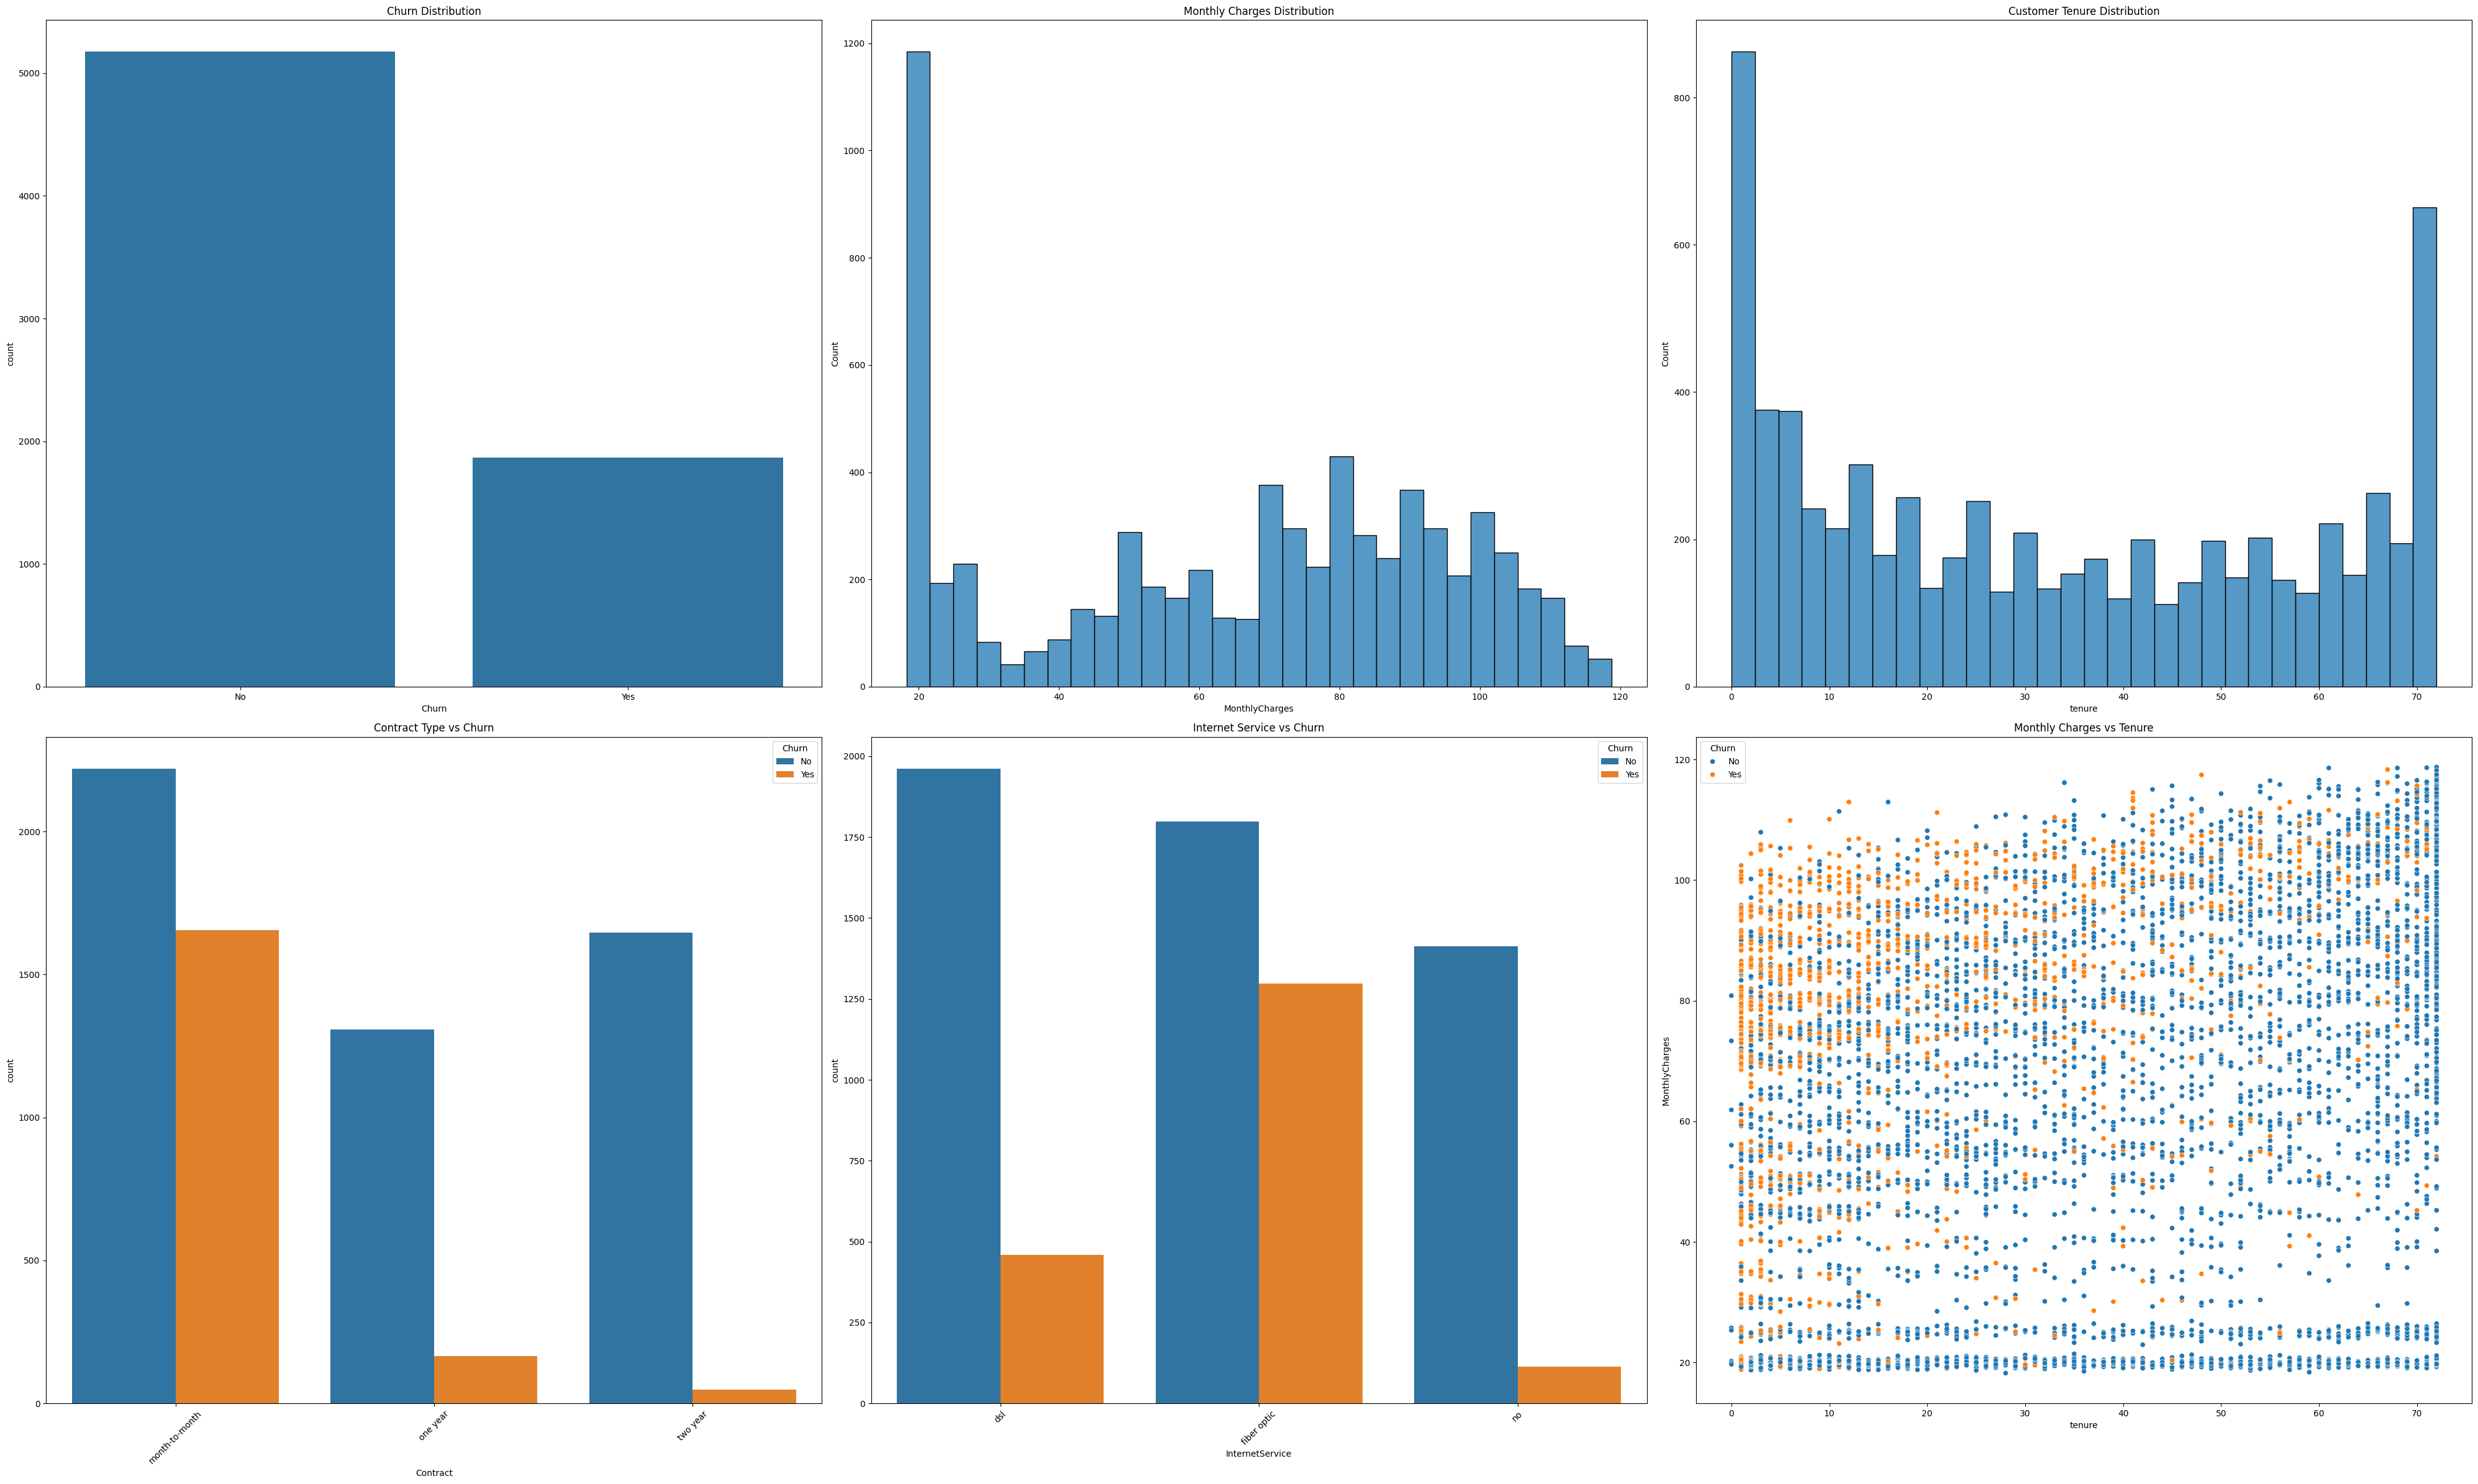

In [6]:
# Create a figure with subplots
plt.figure(figsize=(40, 24))
# 1. Churn Distribution
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
# 2. Monthly Charges Distribution
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='MonthlyCharges', bins=30)
plt.title('Monthly Charges Distribution')
# 3. Tenure Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='tenure', bins=30)
plt.title('Customer Tenure Distribution')
# 4. Contract Type vs Churn
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)
# 5. Internet Service vs Churn
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Internet Service vs Churn')
plt.xticks(rotation=45)
# 6. Monthly Charges vs Tenure with Churn
plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=1)
plt.title('Monthly Charges vs Tenure')
plt.tight_layout()
plt.show()

In [7]:
# Calculate some key metrics
churn_rate = (df['Churn'] == 'Yes').mean() * 100
avg_monthly_charges = df['MonthlyCharges'].mean()
avg_tenure = df['tenure'].mean()

print('\
Key Metrics:')
print('Churn Rate: {:.1f}%'.format(churn_rate))
print('Average Monthly Charges: ${:.2f}'.format(avg_monthly_charges))
print('Average Tenure: {:.1f} months'.format(avg_tenure))

# Top payment methods
print('\
Payment Method Distribution:')
print(df['PaymentMethod'].value_counts(normalize=True).multiply(100).round(1))

Key Metrics:
Churn Rate: 26.5%
Average Monthly Charges: $64.76
Average Tenure: 32.4 months
Payment Method Distribution:
PaymentMethod
electronic check             33.6
mailed check                 22.9
bank transfer (automatic)    21.9
credit card (automatic)      21.6
Name: proportion, dtype: float64


here, I am just gonna present each plot/chart from the plot above

Text(0.5, 1.0, 'Churn Distribution')

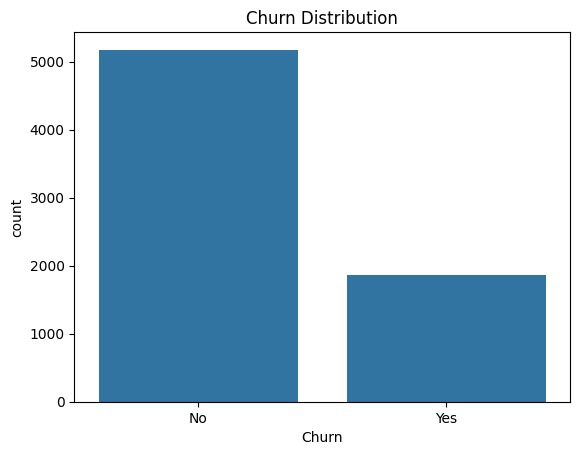

In [8]:
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')

Bar graph showing the number of the customers leaving "Yes"

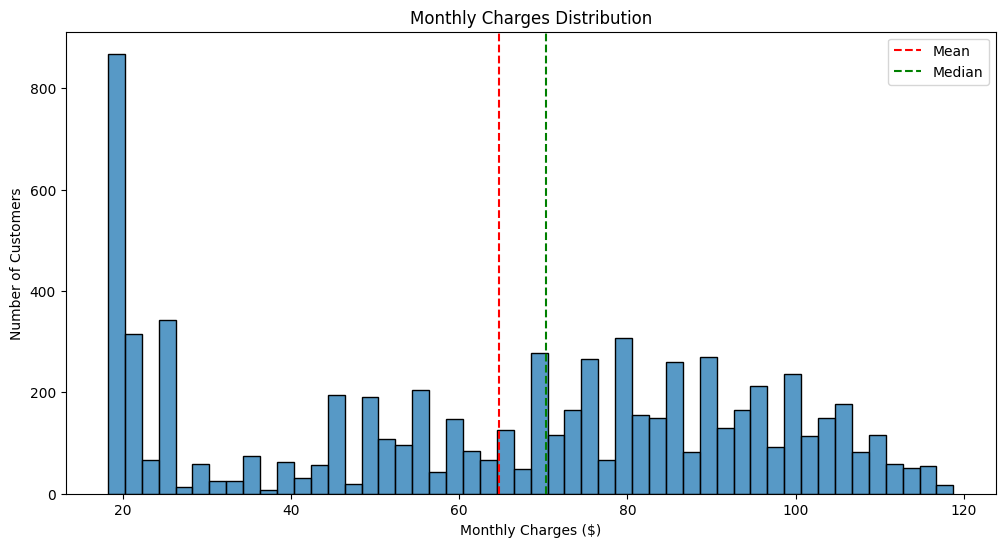

Customer Distribution by Price Ranges:
MonthlyCharges
$0-30     1653
$30-60    1265
$60-90    2386
$90+      1739
Name: count, dtype: int64


In [9]:
# Create a more detailed distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='MonthlyCharges', bins=50)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')

# Add vertical lines for key statistics
plt.axvline(df['MonthlyCharges'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['MonthlyCharges'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

# Show price tiers
print('\
Customer Distribution by Price Ranges:')
price_ranges = pd.cut(df['MonthlyCharges'], 
                     bins=[0, 30, 60, 90, 120],
                     labels=['$0-30', '$30-60', '$60-90', '$90+'])
print(price_ranges.value_counts().sort_index())

**This is a more detailed distribution**:

- Most customers cluster in the **$60-90** range (**2,386 customers**)
  
- There's a noticeable peak around **$20** (basic services)

- Another peak around **$80-90** (premium services)

- Mean charge (**red dashed line**) is **$64.76**

- Median (**green dashed line**) at **$70.35**

- Very few customers pay above **$110**


Text(0.5, 1.0, 'Customer Tenure Distribution')

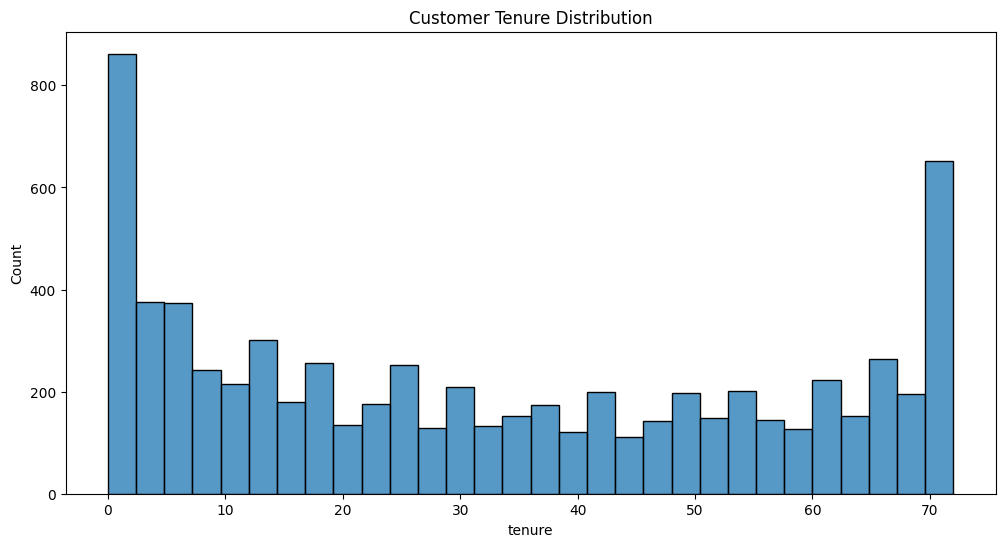

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', bins=30)
plt.title('Customer Tenure Distribution')

**Customer Tenure Distribution**:

- here's a large group of newer customers **(0-10 months)**

- Another peak around **70** months suggests a stable long-term customer base

- The pattern suggests customer retention challenges in the early months, but those who stay past the first year tend to remain longer


([0, 1, 2],
 [Text(0, 0, 'month-to-month'),
  Text(1, 0, 'one year'),
  Text(2, 0, 'two year')])

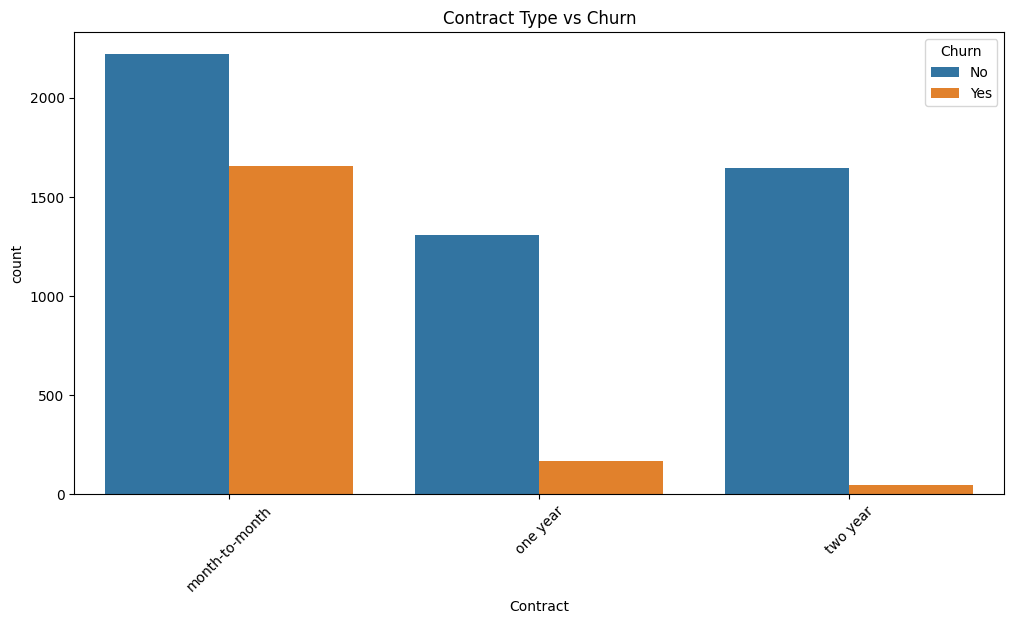

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)

Month-to-Month Contracts:

- Highest churn rate: The month-to-month contract type exhibits the highest number of churned customers (orange bar) compared to the other contract types.

- Large customer base: While it has the highest churn, it also has the largest number of total customers (sum of blue and orange bars), indicating it's a popular choice.

One Year Contracts:

- Moderate churn rate: The one-year contract shows a significantly lower churn rate than the month-to-month contract.

- Substantial customer base: It still holds a considerable number of customers, although less than the month-to-month category.
Two Year Contracts:

Lowest churn rate: The two-year contract has the lowest churn rate, with a very small number of churned customers.

- Smaller customer base: The total number of customers on two-year contracts is the lowest among the three types.

([0, 1, 2], [Text(0, 0, 'dsl'), Text(1, 0, 'fiber optic'), Text(2, 0, 'no')])

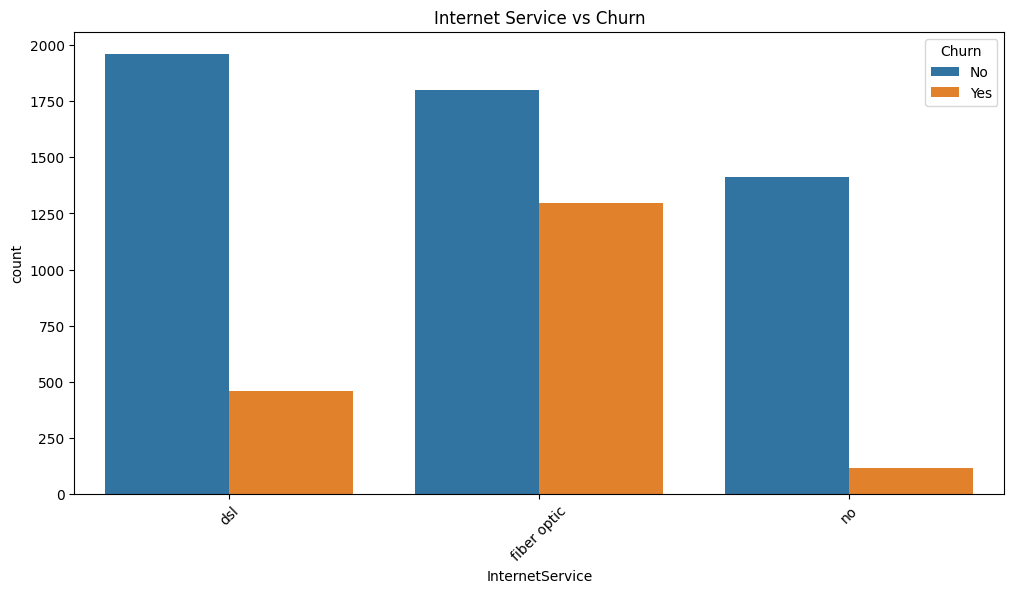

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Internet Service vs Churn')
plt.xticks(rotation=45)

- Fiber Optic: High churn rate despite being the most popular service.

- DSL: Moderate churn rate, less than fiber optic but more than those without internet.

- No Internet Service: Lowest churn rate, but this graph may represent something different (e.g., discontinuing other services, etc).

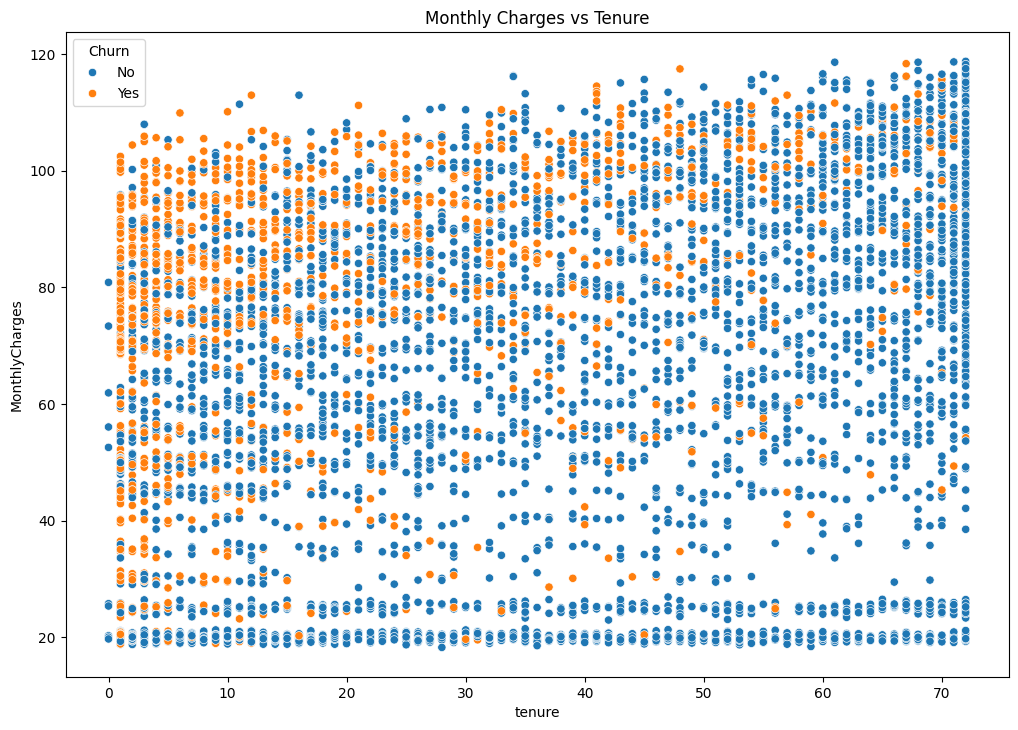

In [16]:
plt.figure(figsize=(30, 14))
plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=1)
plt.title('Monthly Charges vs Tenure')
plt.tight_layout()
plt.show()

- High Charges & Churn: High-paying customers (especially with longer tenure) churn more.

- High-Charge Churn Across Tenure: High-paying customers churn regardless of how long they've been with the company.

- Low Charges = Low Churn: Low-paying customers rarely churn.

- Tenure Doesn't Protect High-Payers: Even long tenure doesn't prevent high-paying customers from churning.

- Vulnerable Segment: High-spending, long-tenured churners are a key target for retention efforts.